<a href="https://colab.research.google.com/github/chandra-gorentla/Mangos-App/blob/master/lesson2_mango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
![ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [18]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [31]:
mango_types = ('Alphonso', 'Banganapalle', 'Chaunsa', 'Dasheri', 'Himsagar', 'Kesar', 'Langra', 'Neelam', 'Totapuri')

In [19]:
data_path = Path('/content/gdrive/MyDrive/mangoes')

In [41]:
for m_type in mango_types:
  search_m = m_type + ' mangoes'
  dest = (data_path/m_type)
  dest.mkdir(exist_ok=True)
  results = fastbook.search_images_ddg(f'{m_type}')
#  print(results)
  download_images(dest, urls=results)

# results = fastbook.search_images_ddg('banganapalli mangoes')
#results

In [42]:
image_files = get_image_files(data_path)
wrong_files = verify_images(image_files)
wrong_files

(#22) [Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000052.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000078.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000105.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000093.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000107.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000142.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000163.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000174.jpg'),Path('/content/gdrive/MyDrive/mangoes/Banganapalle/00000009.jpg'),Path('/content/gdrive/MyDrive/mangoes/Banganapalle/00000104.jpg')...]

In [43]:
wrong_files.map(Path.unlink)

(#22) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
#for o in mango_types:
#    # convert all PNG, GIF images to RGBA
#    for image in os.listdir(data_path/o):
#        ext = os.path.splitext(image)[1]
#        if ext in ['.png', '.gif', '.jpeg', '.jpg']:
#            new_filename = os.path.splitext(image)[0]+'.png'
#            print('ext - ' + ext)
#            print('name - ' + image)
#            print('first_part - ' + os.path.splitext(image)[1])
#            print('full path - ' + str(data_path/o/image))
#            img = Image.open(data_path/o/image)
#            img.convert('RGBA')
#            os.unlink(data_path/o/image)
#            img.save(str(data_path/o/new_filename))
#            print('saving: ' + new_filename)

In [45]:
mangoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

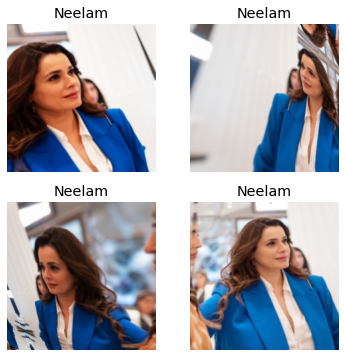

In [46]:
mangoes = mangoes.new(item_tfms = RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms(mult=2))
#mangoes = mangoes.new(item_tfms = Resize(128, method=ResizeMethod.Crop))
dls = mangoes.dataloaders(data_path)
dls.train.show_batch(max_n = 4, unique=True)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10, freeze_epochs=5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


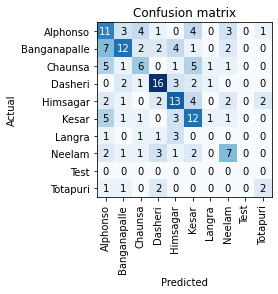

In [12]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

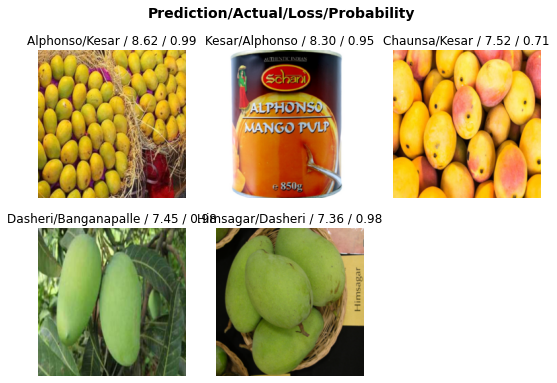

In [ ]:
interpret.plot_top_losses(5)

In [ ]:
cleaner = ImageClassifierCleaner(learn)

NameError: ignored

In [ ]:
cleaner

In [ ]:
os.chdir(data_path)

NameError: ignored

In [1]:
learn.export()

NameError: ignored

In [ ]:
infer_learn = load_learner('export.pkl')

In [ ]:
os.listdir(data_path/'Test')

In [ ]:
infer_learn.predict(data_path/'Test'/'banganapalli.jpeg')

In [ ]:
infer_learn.predict(data_path/'Test'/'totapuri.jpeg')

In [ ]:
??infer_learn

In [ ]:
infer_learn.dls.vocab

In [ ]:
uploaded_file = widgets.FileUpload()

In [ ]:
uploaded_file

In [ ]:
uploaded_file.data[0]

In [ ]:
uploaded_images =PILImage.create(uploaded_file.data[0])

In [ ]:
uploaded_images

In [ ]:
cat, cat_idx, prob = infer_learn.predict(uploaded_images)

In [ ]:
print(f'Category - {cat}, Probability - {prob[cat_idx]:.04f}')

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(uploaded_images.to_thumb(64))
out_pl

In [ ]:
def on_classify_button(change):
  upl_image = PILImage.create(uploaded_file.data[-1])
  out_pl = widgets.Output()
  out_pl.clear_output()
  with out_pl: display(upl_image.to_thumb(64))
  cat, cat_idx, prob = infer_learn.predict(upl_image)
  lable.value = f'Category - {cat}, Probability - {prob[cat_idx]:.04f}'



In [ ]:
uploaded_file = widgets.FileUpload()
classify_button = widgets.Button(description='Classify Mango')
classify_button